In [1]:
# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler
from joblib import dump, load


import numpy as np
from numpy import random
import matplotlib.pyplot as plt
# import autokeras as ak
import os 
import time
import importlib
import logging
from tqdm import tqdm

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

# limit GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
        
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)

logging.info("numpy Version is {}".format(np.__version__))
# logging.info("autokeras Version is {}".format(ak.__version__))
logging.info("tensorflow Version is {}".format(tf.keras.__version__))
logging.info("\n")

!nvidia-smi
%config InlineBackend. figure_format = 'retina'

INFO:root:numpy Version is 1.19.5
INFO:root:tensorflow Version is 2.4.0
INFO:root:



1 Physical GPUs, 1 Logical GPU
Tue Oct 26 23:05:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM-80GB       On   | 00000000:4C:00.0 Off |                    0 |
| N/A   33C    P0    94W / 400W |  14230MiB / 81251MiB |     87%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                         

In [27]:
%%time
#Load Model
experiment = "dune"

model_theta23 = { }
model_delta = { }
scale_range = (-1,39)#range(-1, 40, 1)

for i in scale_range:
    if i == -1:       
        model_theta23.update({"asimov": 0}) 
        model_delta.update({"asimov": 0}) 
    else:
        model_theta23.update({"std_scale_"+str(i): 0}) 
        model_delta.update({"std_scale_"+str(i): 0}) 
                      
        

for i, (std_scale, nth_scale) in enumerate(zip(model_theta23, scale_range)):
    
    if std_scale == "asimov" :
#         file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_theta23_asimov.h5"
        file_path = "/dicos_ui_home/alanchung/ML4NO/Poisson_Learning_Study/Model_v2_to_5GeV/dune_theta23_poisson_299_4.h5"
    else:
#         file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/" + str(experiment) + "_" + "theta23_std" + "_" + str(nth_scale) + "_poisson_10_.h5"
        file_path = "/dicos_ui_home/alanchung/ML4NO/Poisson_Learning_Study/Model_v2_to_5GeV/dune_theta23_poisson_299_4.h5"
        
    if os.path.isfile(file_path):
        
#         logging.info(str(file_path) +" exists.")

        model_theta23[std_scale] = load_model(file_path)

    else:
        logging.info("Please Check Input Files!!!")
        raise ValueError("Please Check Input Files!!!")

logging.info("\n")
        
for i, (std_scale, nth_scale) in enumerate(zip(model_delta, scale_range)):
    
    if std_scale == "asimov" :
#         file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_asimov_4.h5"
        file_path = "/dicos_ui_home/alanchung/ML4NO/Poisson_Learning_Study/Model_v2_to_5GeV/dune_delta_poisson_299_4.h5"
    else:
#         file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/" + str(experiment) + "_" + "delta_std" + "_" + str(nth_scale) + "_poisson_10_4.h5"
        file_path = "/dicos_ui_home/alanchung/ML4NO/Poisson_Learning_Study/Model_v2_to_5GeV/dune_delta_poisson_299_4.h5"
    
    if os.path.isfile(file_path):
        
#         logging.info(str(file_path) +" exists.")

        model_delta[std_scale] = load_model(file_path)

    else:
        logging.info("Please Check Input Files!!!")
        raise ValueError("Please Check Input Files!!!")
        

    
if model_theta23["asimov"] != 0 and model_delta["asimov"] != 0:
    logging.info("\n")
    model_theta23["asimov"].summary()
    logging.info("\n")
    model_delta["asimov"].summary()
    
elif model_theta23["std_scale_0"] != 0 and model_delta["std_scale_0"] != 0:
    logging.info("\n")
    model_theta23["std_scale_0"].summary()
    logging.info("\n")
    model_delta["std_scale_0"].summary()

else:
    pass
    
logging.info("\n")
logging.info("All Models are loaded!")

INFO:root:

INFO:root:

INFO:root:

INFO:root:

INFO:root:All Models are loaded!


Model: "Combined"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
BatchNormalization_all_input (I [(None, 144)]        0                                            
__________________________________________________________________________________________________
BatchNormalization_diff_input ( [(None, 72)]         0                                            
__________________________________________________________________________________________________
BatchNormalization_all (BatchNo (None, 144)          576         BatchNormalization_all_input[0][0
__________________________________________________________________________________________________
BatchNormalization_diff (BatchN (None, 72)           288         BatchNormalization_diff_input[0][
___________________________________________________________________________________________

In [36]:
%%time
# test_data = np.load('../Data/sample_NuFit0911.npz')
test_data = np.load('../Data/best_fit_spectrum_DUNE.npz')

theta23_true = test_data["theta23_true"]/(2*np.pi)*360
delta_true = test_data["delta_true"]
theta23_best_fit = test_data["theta23_fit"]/(2*np.pi)*360
delta_best_fit = test_data["delta_fit"]

parameter_range = np.where(np.logical_and(delta_true >= 0, delta_true <= 360 ))[0][:1000]


theta23_true = theta23_true[parameter_range]
delta_true = delta_true[parameter_range]
theta23_best_fit = theta23_best_fit[parameter_range]
delta_best_fit = delta_best_fit[parameter_range]

mc_data = np.column_stack([test_data["ve_"+str(experiment)+"_poisson"][:,1:37],
                           test_data["vu_"+str(experiment)+"_poisson"][:,1:37],
                           test_data["vebar_"+str(experiment)+"_poisson"][:,1:37],
                           test_data["vubar_"+str(experiment)+"_poisson"][:,1:37]])

mc_data = mc_data[parameter_range]


logging.info("MC Data Shape:{}".format(mc_data.shape))
logging.info("theta23 true Shape:{}".format(theta23_true.shape))
logging.info("delta true Shape:{}".format(delta_true.shape))
logging.info("theta23 best fit Shape:{}".format(theta23_best_fit.shape))
logging.info("delta best fit Shape:{}".format(delta_best_fit.shape))





# data_IO_mid = mc_data[0]
# data_NO_mid = mc_data[2]

# logging.info("Test IO Data Shape:{}".format(data_IO_mid.shape))
# logging.info("Test NO Data Shape:{}".format(data_NO_mid.shape))

INFO:root:MC Data Shape:(1000, 144)
INFO:root:theta23 true Shape:(1000,)
INFO:root:delta true Shape:(1000,)
INFO:root:theta23 best fit Shape:(1000,)
INFO:root:delta best fit Shape:(1000,)


CPU times: user 7.79 ms, sys: 2.38 ms, total: 10.2 ms
Wall time: 8.44 ms


In [37]:
%%time
test_data = np.load('../Data/sample_NuFit0911.npz')
data_mid = np.column_stack([test_data["ve_"+str(experiment)][:,:36], test_data["vu_"+str(experiment)][:,:36], test_data["vebar_"+str(experiment)][:,:36], test_data["vubar_"+str(experiment)][:,:36]])
# data_mid = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
# data_mid = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'],data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])
data_IO_mid = data_mid[0]
data_NO_mid = data_mid[1]

logging.info("Test IO Data Shape:{}".format(data_IO_mid.shape))
logging.info("Test NO Data Shape:{}".format(data_NO_mid.shape))


N = 1000


IO_or_NO = 0 # 0 for IO and 1 for NO


if IO_or_NO == 0:
    logging.info("IO")
    logging.info("True point: theta_23 = {:.2f} \delta_cp = {:.2f}".format(test_data['theta23'][0], test_data['delta'][0]))
    
    data_asimov = data_IO_mid.reshape(1,data_IO_mid.shape[0])
    data_poisson = random.poisson(data_IO_mid, size = (N, len(data_IO_mid)))
    ordering = "Inverse Ordering"
    
else:
    logging.info("NO")
    logging.info("True point: theta_23 = {:.2f} \delta_cp = {:.2f}".format(test_data['theta23'][1], test_data['delta'][1]))
    
    data_asimov = data_NO_mid.reshape(1,data_NO_mid.shape[0])
    data_poisson = random.poisson(data_NO_mid, size = (N, len(data_NO_mid)))
    ordering = "Normal Ordering"
    

INFO:root:Test IO Data Shape:(144,)
INFO:root:Test NO Data Shape:(144,)
INFO:root:IO
INFO:root:True point: theta_23 = 49.00 \delta_cp = 195.00


CPU times: user 25.4 ms, sys: 1.43 ms, total: 26.9 ms
Wall time: 24.9 ms


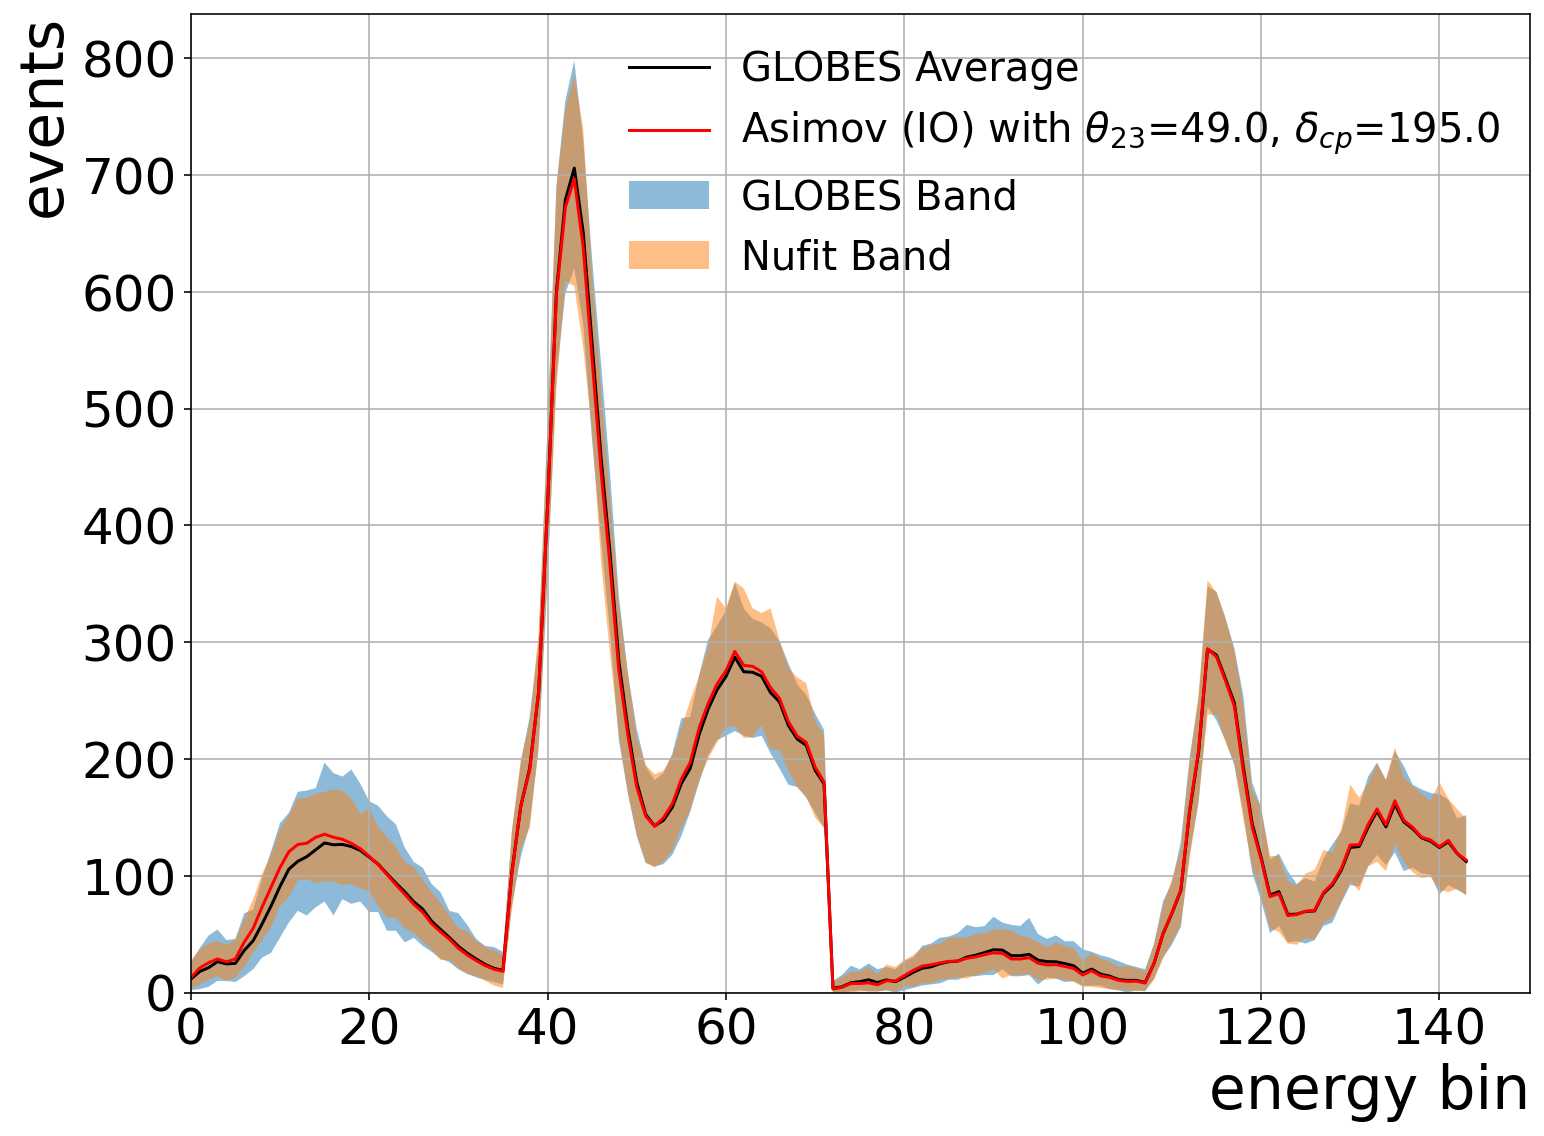

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


average = np.average(mc_data[:,:],axis=0)
p_yerr = np.max(mc_data[:,:],axis=0)
n_yerr = np.min(mc_data[:,:],axis=0)
# uncertainty = [n_yerr, p_yerr]

# plt.errorbar(range(144), average, yerr=uncertainty, fmt='o',ms=5)
plt.fill_between(range(144), n_yerr, p_yerr, alpha=0.5, label="GLOBES Band")
plt.plot(range(144), average, c="k", label="GLOBES Average")



nufit_average = np.average(data_poisson,axis=0)
nufit_max = np.max(data_poisson,axis=0)
nufit_min = np.min(data_poisson,axis=0)


plt.fill_between(range(144), nufit_min, nufit_max, alpha=0.5, label="Nufit Band")
if IO_or_NO == 0:
    plt.plot(range(144), data_asimov[0], c="r", label="Asimov (IO) with $\\theta_{23}$=49.0, $\delta_{cp}$=195.0")
else:    
    plt.plot(range(144), data_asimov[0], c="r", label="Asimov (NO) with $\\theta_{23}$=49.3, $\delta_{cp}$=286.0")


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlabel("energy bin", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("events", fontsize=30, horizontalalignment='right',y=1)
plt.grid()
plt.xlim((0))
plt.ylim((0))
plt.legend(bbox_to_anchor=(0.3, 1),ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)

plt.show()

In [39]:
%%time

def Contour(resolution_dictinary, model_dictinary, model="model_1"):
    logging.info("==========================================================")
    logging.info("===================== Model: {} =====================".format(model))
    logging.info("==========================================================")
    logging.info("\n")
    for i, std_scale in enumerate(tqdm(resolution_dictinary)):
        
        if model == "model_1" or model == "model_2":
#             prediction_asimov = model_dictinary[std_scale].predict(data_asimov)[0][0]
            tmp = model_dictinary[std_scale].predict(mc_data)[:,0]
            
        elif model == "model_3" or model == "model_4" or model == "model_5":
#             prediction_asimov = model_dictinary[std_scale].predict([data_asimov,data_asimov[:,:72]-data_asimov[:,72:]])[0][0]
            tmp = model_dictinary[std_scale].predict([mc_data,mc_data[:,:72]-mc_data[:,72:]])#[:,0]
    
            """
            TEST
            """
            tmp = np.arctan2(tmp[:,0],tmp[:,1]) # 10/26 modified 
            tmp = np.where(tmp > 0 , tmp, 2*np.pi+tmp) # 10/26 modified 
            tmp = tmp/np.pi*180 # 10/26 modified 
            
            
        else:
            logging.info("Please Check Input Model!!!")
            raise ValueError("Please Check Input Model!!!")

        resolution_dictinary[std_scale]["poission_prediction"] = tmp
    
    return resolution_dictinary
    
    

theta23_prediction = {}
delta_prediction = {}

for i in scale_range:
    
    if i == -1:  
        theta23_prediction.update({"asimov": {"poission_prediction":0},}) 
        delta_prediction.update({"asimov": {"poission_prediction":0},}) 
        
    else:
        theta23_prediction.update({"std_scale_"+str(i): {"poission_prediction":0},}) 
        delta_prediction.update({"std_scale_"+str(i): {"poission_prediction":0},}) 


    
theta23_prediction = Contour(theta23_prediction, model_theta23, model="model_4")
        
delta_prediction = Contour(delta_prediction, model_delta, model="model_4")
    
    

INFO:root:==========================================================
INFO:root:===================== Model: model_4 =====================
INFO:root:==========================================================
INFO:root:

100%|██████████| 2/2 [00:00<00:00, 12.59it/s]
INFO:root:==========================================================
INFO:root:===================== Model: model_4 =====================
INFO:root:==========================================================
INFO:root:

100%|██████████| 2/2 [00:00<00:00, 13.35it/s]

CPU times: user 291 ms, sys: 46.1 ms, total: 337 ms
Wall time: 315 ms


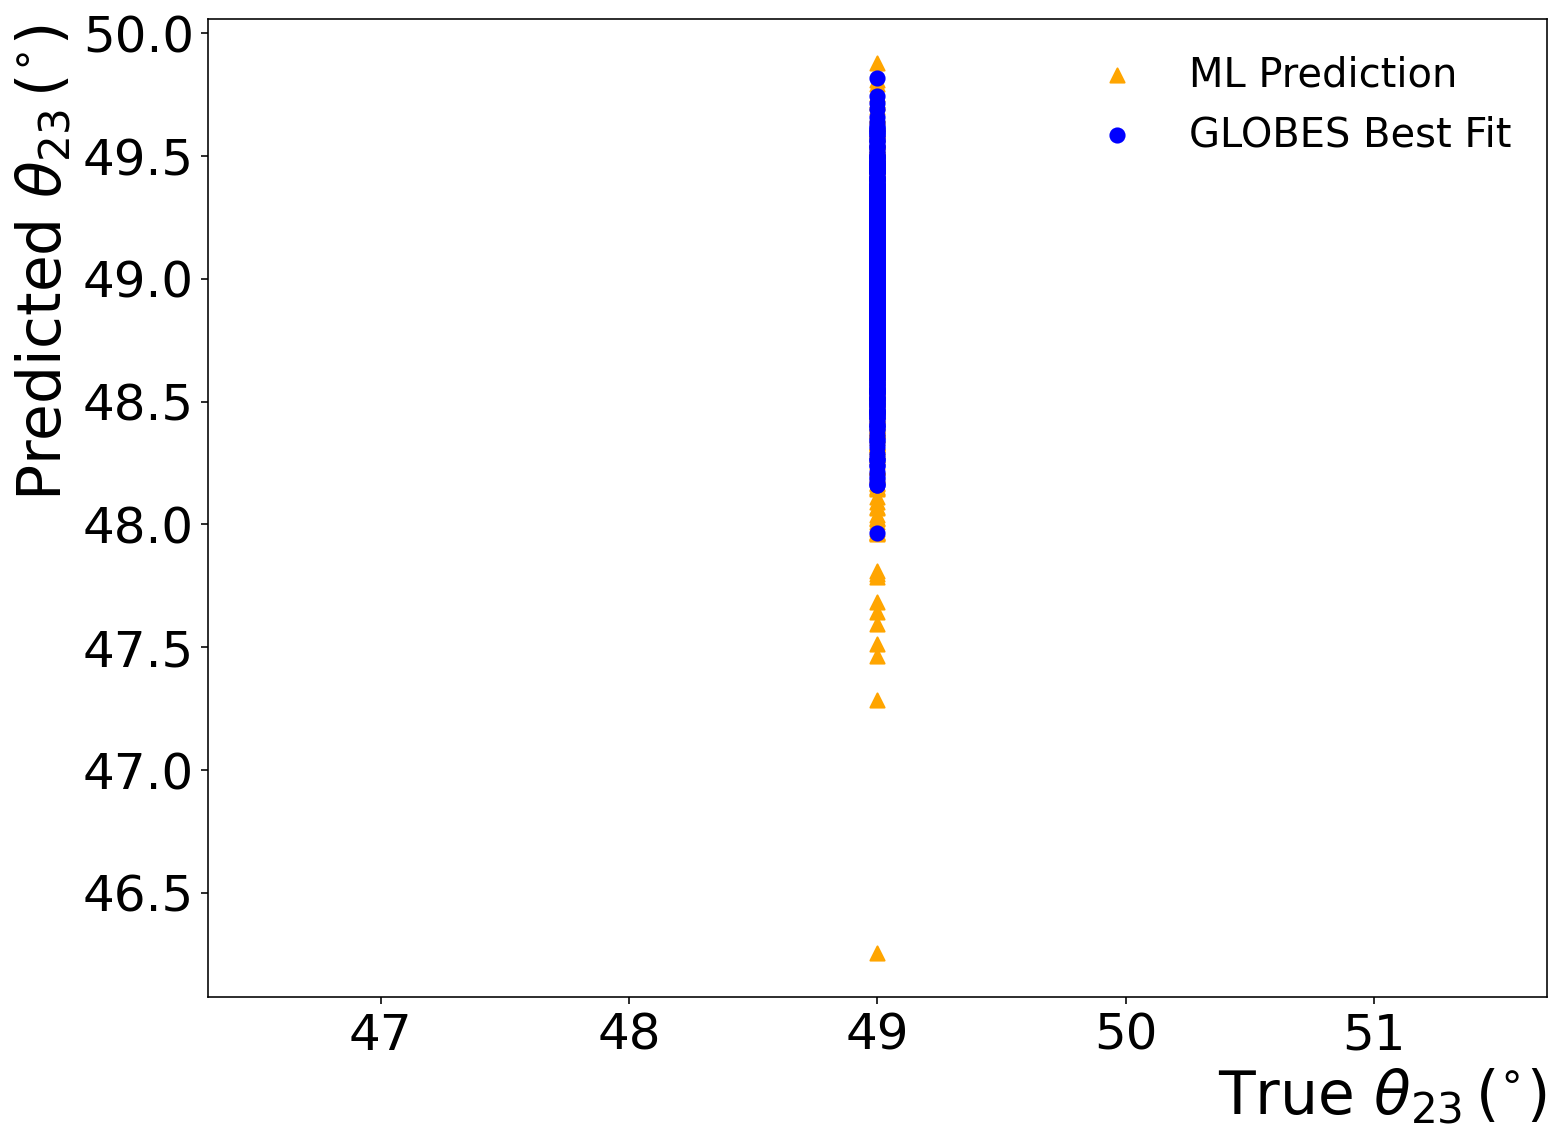

CPU times: user 552 ms, sys: 35.6 ms, total: 587 ms
Wall time: 585 ms


In [40]:
%%time

fig, ax = plt.subplots(1,1, figsize=(12,9))

# std_scale = np.logspace(-3, np.log10(2), 40)[scale_range[1:]]
# prediction_asimov = [theta23_resolution[std_scale]["asimov"] for std_scale in theta23_resolution if std_scale != "asimov"]
ML_theta23_best_fit = theta23_prediction["std_scale_39"]["poission_prediction"]#[theta23_prediction[std_scale]["poission_prediction"] for std_scale in theta23_prediction if std_scale != "asimov"]
# p_yerr = np.array([theta23_resolution[std_scale]["p_yerr"] for std_scale in theta23_resolution if std_scale != "asimov"]) - np.array(best_fit)
# n_yerr = np.array(best_fit) - np.array([theta23_resolution[std_scale]["n_yerr"] for std_scale in theta23_resolution if std_scale != "asimov"])
# uncertainty = [n_yerr, p_yerr]

plt.scatter(theta23_true, ML_theta23_best_fit, color='orange', marker = "^", s=50, label="ML Prediction")
plt.scatter(theta23_true, theta23_best_fit, color='blue', marker = "o", s=50, label="GLOBES Best Fit")
# plt.errorbar(std_scale, best_fit, yerr=uncertainty, fmt='o',ms=5, label="Predicted $\\theta_{23}$ (poisson included)")
# plt.axhline(y=test_data['theta23'][IO_or_NO] , color='r', linestyle='-', label="True $\\theta_{23}$")

# if IO_or_NO == 0:
#     plt.text(x=0.001,y=53.3, s="Inverse Ordering", fontsize=25 )
# elif IO_or_NO == 1:
#     plt.text(x=0.001,y=53.3, s="Normal Ordering", fontsize=25 )


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.xlim((0.0008, 2.5))
# plt.xscale("log")
# plt.xlim((44, 54))
# plt.ylim((44, 54))
plt.xlabel("True $\\theta_{23}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\\theta_{23}\,(^{\circ})$ ", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
 
# plt.savefig("./Plots/"+str(experiment)+"_"+str("to_5GeV")+"_"+str(ordering)+"_theta23_std_evolution.pdf", transparent=True, bbox_inches='tight') 


plt.show()

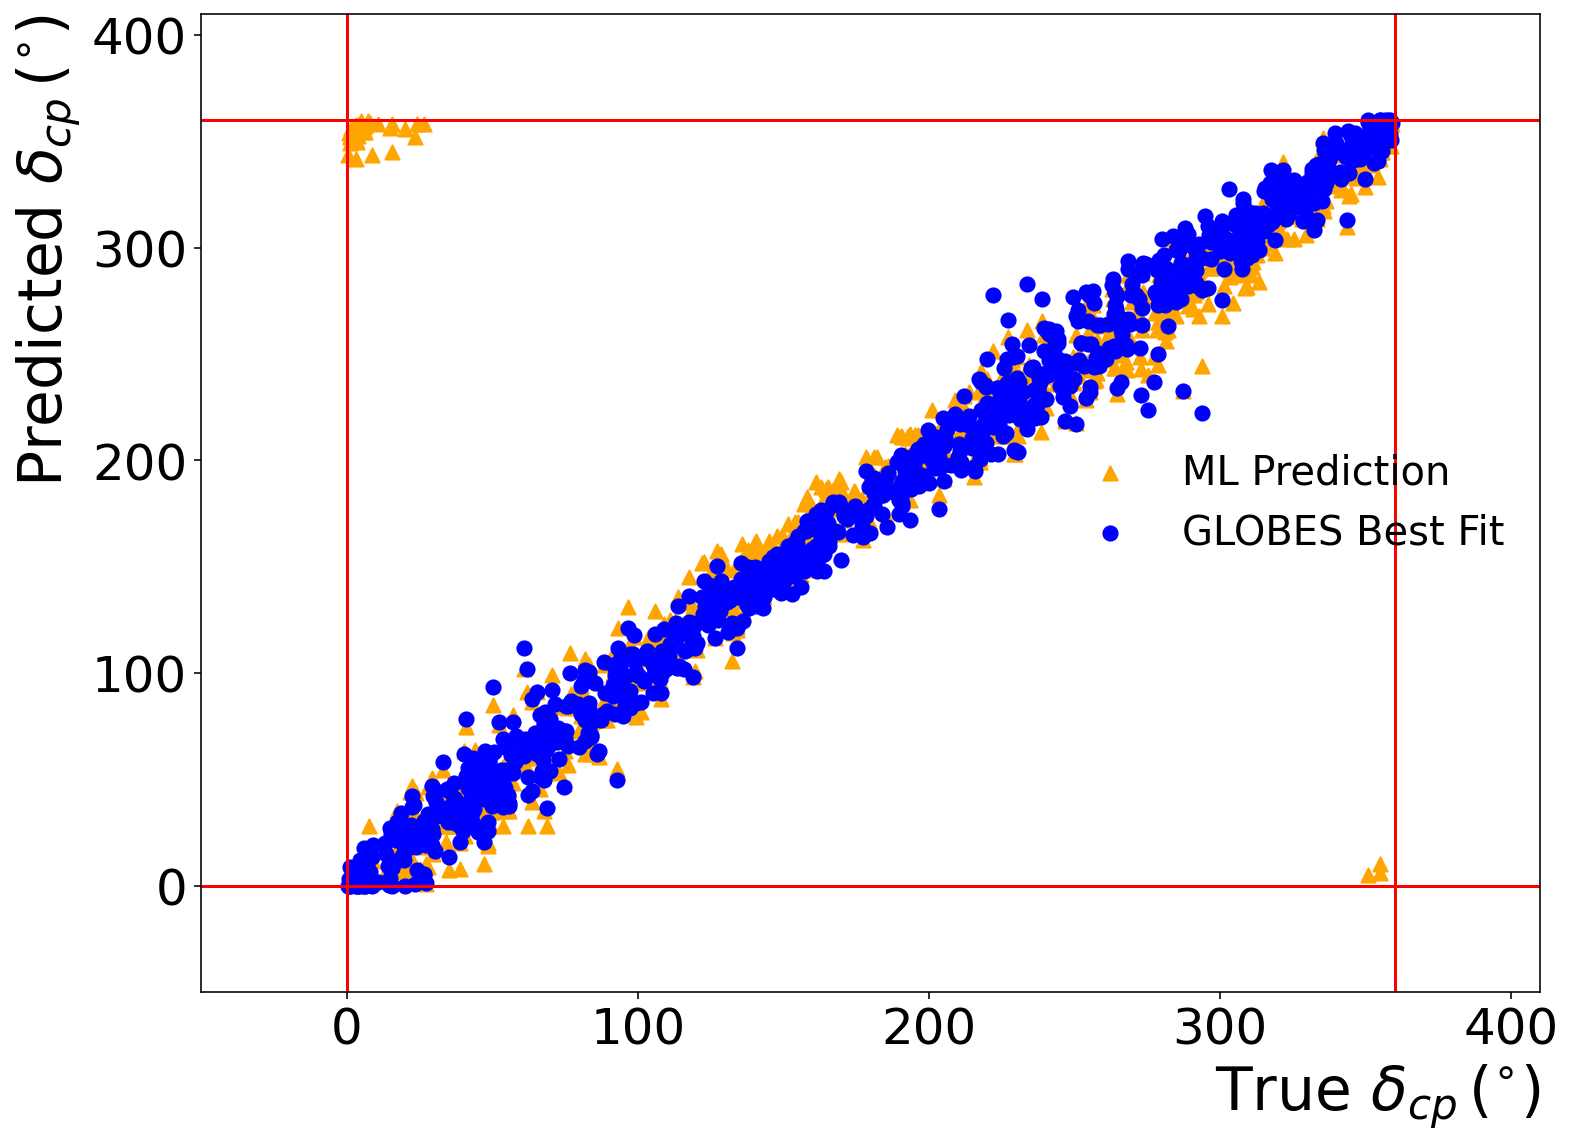

CPU times: user 401 ms, sys: 163 ms, total: 564 ms
Wall time: 382 ms


In [41]:
%%time

fig, ax = plt.subplots(1,1, figsize=(12,9))

# std_scale = np.logspace(-3, np.log10(2), 40)[scale_range[1:]]
# prediction_asimov = [theta23_resolution[std_scale]["asimov"] for std_scale in theta23_resolution if std_scale != "asimov"]
ML_delta_best_fit = delta_prediction["std_scale_39"]["poission_prediction"] #[delta_prediction[std_scale]["poission_prediction"] for std_scale in delta_prediction if std_scale != "asimov"]
# p_yerr = np.array([theta23_resolution[std_scale]["p_yerr"] for std_scale in theta23_resolution if std_scale != "asimov"]) - np.array(best_fit)
# n_yerr = np.array(best_fit) - np.array([theta23_resolution[std_scale]["n_yerr"] for std_scale in theta23_resolution if std_scale != "asimov"])
# uncertainty = [n_yerr, p_yerr]

plt.scatter(delta_true, ML_delta_best_fit, color='orange', marker = "^", s=50, label="ML Prediction")
plt.scatter(delta_true, delta_best_fit, color='blue', marker = "o", s=50, label="GLOBES Best Fit")
# plt.errorbar(std_scale, best_fit, yerr=uncertainty, fmt='o',ms=5, label="Predicted $\\theta_{23}$ (poisson included)")
plt.axvline(x=0 , color='r', linestyle='-')
plt.axvline(x=360 , color='r', linestyle='-')
plt.axhline(y=0 , color='r', linestyle='-')
plt.axhline(y=360 , color='r', linestyle='-')


# if IO_or_NO == 0:
#     plt.text(x=0.001,y=53.3, s="Inverse Ordering", fontsize=25 )
# elif IO_or_NO == 1:
#     plt.text(x=0.001,y=53.3, s="Normal Ordering", fontsize=25 )


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.xlim((0.0008, 2.5))
# plt.xscale("log")
plt.xlim((-50, 410))
plt.ylim((-50, 410))
plt.xlabel("True $\delta_{cp}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\delta_{cp}\,(^{\circ})$", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
 
# plt.savefig("./Plots/"+str(experiment)+"_"+str("to_5GeV")+"_"+str(ordering)+"_theta23_std_evolution.pdf", transparent=True, bbox_inches='tight') 


plt.show()

In [42]:
logging.info("theta 23 MSE-> GLOBES : {:.3f}, ML : {:.3f}".format(np.average((theta23_best_fit-theta23_true)**2),
                                                          np.average((ML_theta23_best_fit-theta23_true)**2)
                                                                ))
logging.info("Delta MSE-> GLOBES : {:.3f}, ML : {:.3f}".format(np.average((delta_best_fit-delta_true)**2),
                                                       np.average((ML_delta_best_fit-delta_true)**2)
                                                                ))

logging.info("\r")
logging.info("\r")
logging.info("theta 23 STD-> GLOBES : {:.3f}, ML : {:.3f}".format(np.std((theta23_best_fit-theta23_true)),
                                                          np.std((ML_theta23_best_fit-theta23_true))
                                                                ))
logging.info("Delta STD-> GLOBES : {:.3f}, ML : {:.3f}".format(np.std((delta_best_fit-delta_true)),
                                                       np.std((ML_delta_best_fit-delta_true))
                                                                ))


logging.info("\r")
logging.info("\r")
logging.info("theta 23 MAE-> GLOBES : {:.3f}, ML : {:.3f}".format(np.average(np.abs(theta23_best_fit-theta23_true)),
                                                          np.average(np.abs(ML_theta23_best_fit-theta23_true))
                                                                ))
logging.info("Delta MAE-> GLOBES : {:.3f}, ML : {:.3f}".format(np.average(np.abs(delta_best_fit-delta_true)),
                                                       np.average(np.abs(ML_delta_best_fit-delta_true))
                                                                ))


logging.info("\r")
logging.info("\r")
logging.info("theta 23 RMS-> GLOBES : {:.3f}, ML : {:.3f}".format(np.sqrt(np.average((theta23_best_fit-theta23_true)**2)),
                                                          np.sqrt(np.average((ML_theta23_best_fit-theta23_true)**2))
                                                                ))
logging.info("Delta RMS-> GLOBES : {:.3f}, ML : {:.3f}".format(np.sqrt(np.average((delta_best_fit-delta_true)**2)),
                                                       np.sqrt(np.average((ML_delta_best_fit-delta_true)**2))
                                                                ))

INFO:root:theta 23 MSE-> GLOBES : 0.077, ML : 0.135
INFO:root:Delta MSE-> GLOBES : 139.333, ML : 3749.397
INFO:root:
INFO:root:
INFO:root:theta 23 STD-> GLOBES : 0.278, ML : 0.366
INFO:root:Delta STD-> GLOBES : 11.803, ML : 60.731
INFO:root:
INFO:root:
INFO:root:theta 23 MAE-> GLOBES : 0.221, ML : 0.276
INFO:root:Delta MAE-> GLOBES : 8.759, ML : 20.298
INFO:root:
INFO:root:
INFO:root:theta 23 RMS-> GLOBES : 0.278, ML : 0.367
INFO:root:Delta RMS-> GLOBES : 11.804, ML : 61.232


In [ ]:
nth = 10
logging.info("Ture theta 23  : {}, GLOBES : {}, ML : {}".format(theta23_true[nth],theta23_best_fit[nth],ML_theta23_best_fit[nth]))
logging.info("Ture Delta  : {}, GLOBES : {}, ML : {}".format(delta_true[nth],delta_best_fit[nth],ML_delta_best_fit[nth]))